# Reshaping arrays

## 1. Motivation 

Sometimes it is necessary to reorganize the data sample from 1 dimensional arrays into 2 or 3 dimensional arrays or the other way around.

### 1.1 Examples: 

(A) The [monthly index of the El Nino - Southern Oscillation](https://www.esrl.noaa.gov/psd/data/correlation/nina34.data) is a time series. 

|year| Jan  | Feb   | Mar   | Apr   | May   | Jun   | Jul   | Aug   | Sep   | Oct   | Nov   | Dec |     |
|-----|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|------|-----|-----|
|1950| 24.55|  25.06|  25.87|  26.28|  26.18|  26.46|  26.29|  25.88|  25.74|  25.69|  25.47|  25.29|
|1951| 25.24|  25.71|  26.90|  27.58|  27.92|  27.73|  27.60|  27.02|  27.23|  27.20|  27.25|  26.91|
|1952| 26.67|  26.74|  27.17|  27.80|  27.79|  27.18|  26.53|  26.30|  26.36|  26.26|  25.92|  26.21|

The data are arranged in a table with rows for the years and columns for the months. You want to plot the monthly mean time series and need to get your data from the 2-dimenionsal array into a 1-dimensional array.

(B) You have a 3-dimensional data set containing globally gridded 0.5 x 0.5 degree temperature data from the [ERA-Interim/Land](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era-interim-land). Dimensions are longitude, latitude, and time. Multivariate statistical functions, however, often expect data to be arranged in rows for time dimension and columns are used to store all grid cells from the lon-lat dimensions.

(C) Some image file formats store their pixel information as a simple text file with RGB values using three columns or even one single column. In this case we need some information about the original dimension of the 2-dimensional image and the order in which the pixel information was stored in the file. 



<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 1: Team activity: Formulate a memorizable rule for reshaping from 1-dim into 2-dim arrays <BR><BR>
</p>
    
In the next four cells we provide a 1-d data array and three examples how to 'reshape' a 1-dimensional array into a 2-dimensional of shape 4 x 5. Review the three code options and discuss in your team:
- Which option do would you choose to study more closely and use in your own code for a similar problem of array reshaping? 
- What rule can be deduced from this example? How is the function _np.reshape_ filling up  2-d array? Which dimension is filled up first, which second?
- Create an illustrative figure that can help you to remember the use of the function _np.reshape_ function for the 2-dimensional situation.


### The 1-dimensional data array

In [1]:
# creating  a small one-dimensional array 
import numpy as np
import matplotlib.pyplot as plt
n1=4
n2=5
nsize=n1*n2
x1d=np.arange(0,nsize,1)
print(x1d)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


### Method 1: 

Using two explicit loops to fill in one value after another into an empty 2-d numpy array


(4, 5)
------------
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]


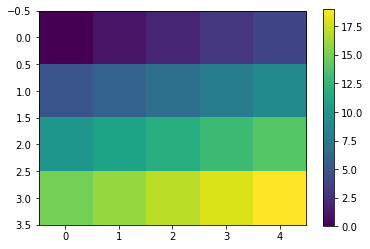

In [2]:
# Method 1: using two explicit loops to fill in one value after another

z=np.empty(shape=(n1,n2))
i=0
k=0
while i<n1:
    j=0
    while j<n2:
        z[i,j]=x1d[k]
        j=j+1
        k=k+1
    i=i+1

print(np.shape(z))
print("------------")
print(z)

plt.imshow(z)
plt.colorbar()
plt.show()

### Method 2: Using one loop to fill up the rows 

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
(4, 5)
------------
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]


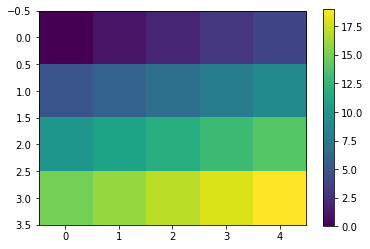

In [3]:
# another way to do this is with one loop and 
# some careful slicing of the 1-dim data array.
# We fill an empty 2d array row by row.

z=np.empty(shape=(n1,n2))
i=0
while i<n1:
    print(x1d[i*n2:(i+1)*n2])
    z[i,:]=x1d[i*n2:(i+1)*n2]
    i=i+1

print(np.shape(z))
print("------------")
print(z)

plt.imshow(z[:,:])
plt.colorbar()
plt.show()

### Method 3:

Application of function _np.reshape()_ with keyword parameter _newshape_

(4, 5)
------------
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


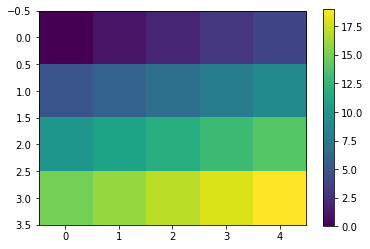

In [4]:
# one function call does the reshaping
x2d=np.reshape(x1d,newshape=[n1,n2])

print(np.shape(x2d))
print("------------")
print(x2d[:,:])
plt.imshow(x2d)
plt.colorbar()
plt.show()

### Team activity:

- Which option do would you use in your own code for a similar problem of array reshaping? 
- What rule can be deduced from this example? How is the function _np.reshape_ filling up  2-d array? Which dimension is filled up first, which second?
- Create an illustrative figure that can help you to remember the use of the function _np.reshape_ function for the 2-dimensional situation.

<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 2: Individual activity: Reshape a 1-dim array into a 2-dimensional array of shape 105 x 128!<BR><BR>
</p>


### Before you continue please download the file labrador.csv from GitHub (data folder) and upload it to your local data folder (the same data folder that we have used before).

In the next cell we provide code that reads data from a CSV file. It contains three columns with data. We select the first column from the data table (with keyword 'usecols').



In [ ]:
data1=np.loadtxt("../data/labrador.csv",delimiter=',',usecols=1)
print(type(data1))
print(data1.shape)
print("check if size of the array is equal to size of 105*128:")
if 105*128==np.size(data1):
    print("Okay. we can fill the 2d array with our data!")
else:
    print("There is a mismatch between the size of the 1d array and the 2d array 105x128!")


In [ ]:
# Data analysis in using 1-dim array
plt.plot(data1)
plt.title("plot of 1-dim data array")
plt.show()

plt.hist(data1)
plt.title("histogram of the data")
plt.show()

In [ ]:
# reshape the array from 1-d to 2-dim
# with 105 rows and 128 columns
# then plot the 2-dim array with function plt.imshow




## Summary

There are several ways in Python's package numpy to reshape data arrays. We covered the basic methods using our learned tools. The function _np.reshape_ is a unverisal method to change the dimension of the data arrays. However, we must remember that there is a default rule how numpy fills the elements into the reshaped array.  

Together with index selection /slicing operations that allow us to extract subsamples from our data arrays, the function np.reshape is giving you more flexibility in working with data sets, such as data from spreadsheet table files. 

__Tip__: If your future research takes you into data analysis you may want to expand your 'tools': the package _pandas_ and _xarray_ are really powerful support packages for data analysis in Python.

### References

These links give you an overview bout two packages that support the work with EXCEL-style spreadsheet tables (csv files are supported, .xls files are supported too, .xlsx files may not work). The xarray package supports NetCDF files (WRF model and climate models generate data output is in this format, for example).

- [Pandas](https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm)
- [xarray](http://xarray.pydata.org/en/stable/faq.html)

Reshaping:

- [Numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [More info and examples](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp)



